#  Lab 3

Load the neccesary libraries

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

Load the data

In [2]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")

Select the features wanted

In [3]:
features = ["age",
            "job",
            "marital",
            "education",
            "default",
            "housing",
            "loan",
            "contact",
            "month",
            "day_of_week",
            "duration",
            "campaign",
            "pdays",
            "previous",
            "poutcome",
            "emp.var.rate",
            "cons.price.idx",
            "cons.conf.idx",
            "euribor3m",
            "nr.employed",
            ]

# Show the features
df[features].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


Select outcomes wanted

In [4]:
outcomes = ["y"]

# Show the outcomes
df[outcomes].head()

,y
0,no
1,no
2,no
3,no
4,no


Create dummies and erase unwanted features

In [5]:
# Create the dummies
df_dummies = pd.get_dummies(df)
df_dummies = df_dummies.copy()

# Erase the features
del df_dummies["duration"]
del df_dummies["y_no"]

## Histogram 

Select the data to be shown in the histograms

In [6]:
#This is the colum of "y_yes"
data = df_dummies.values.T[62]

Create the histogram

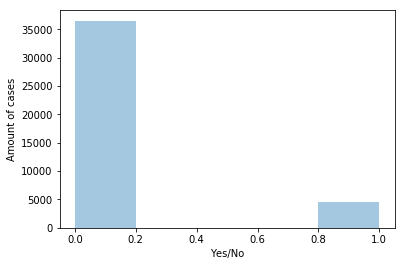

In [7]:
plt.clf()
sns_plot2 = sns.distplot(data, bins=5, kde=False, rug=False).get_figure()

# Labels of the histogram
axes = plt.gca()
axes.set_xlabel('Yes/No')
axes.set_ylabel('Amount of cases')

# Save the histograms
sns_plot2.savefig("histogram_yes.png",bbox_inches='tight')
sns_plot2.savefig("histogram_yes.pdf",bbox_inches='tight')

## Classifier and Cross Validation 

Load the neccesary libraries

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [9]:
# Create the classifier
clf = ExtraTreesClassifier(n_estimators = 100,max_depth = 4)
dummy_clf = DummyClassifier()

# Clear the dummies
df_dummies = df_dummies.dropna()

# Select the nuew outcomes and fetaures
outcomes_of_interest = ["y_yes"]
features = ["age",
            "campaign",
            "pdays",
            "previous",
            "emp.var.rate",
            "cons.price.idx",
            "cons.conf.idx",
            "euribor3m",
            "nr.employed",
            "job_admin.",
            "month_sep",
            "day_of_week_fri",
            "day_of_week_mon",
            "day_of_week_thu",
            "day_of_week_tue",
            "day_of_week_wed",
            "poutcome_failure",
            "poutcome_nonexistent",
            "poutcome_success",
            ]

# Create future variables for the classiifer and crossvalidation section 
X_df = df_dummies[features].copy()
y_df = df_dummies[outcomes_of_interest].copy()

y_df = df_dummies[outcomes_of_interest].copy()

y_df[outcomes_of_interest] = y_df[outcomes_of_interest].apply(LabelEncoder().fit_transform)

X = X_df.values
y = y_df.values.T[0]

Create a 10-Kfold stratified cross-validation

In [10]:
scores = cross_val_score(clf, X, y, cv=10,scoring = make_scorer(acc))
dummy_clf.fit(X,y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

Show the results

In [11]:
print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f")
print(acc(y,dummy_clf.predict(X)))

ACC: 0.85 (+/- 0.14)
Dummy ACC: %0.2f
0.8003787510925512



Create a classifier with ExtraTreesClassifier with 20000 estimators and  show its accuracy

In [12]:
clf = ExtraTreesClassifier(n_estimators = 20000,max_depth = 4)
clf.fit(X,y)

print (acc(y,clf.predict(X)))

0.8993153345634651


##  Sample importances and a confusion matrix

### Sample Importances 

[ 2  8 18  7  4  6  5 17 16  3 10  0 12  1  9 14 15 13 11]
Feature ranking:
1. pdays (0.219112)
2. nr.employed (0.182754)
3. poutcome_success (0.176642)
4. euribor3m (0.154730)
5. emp.var.rate (0.107832)
6. cons.conf.idx (0.044638)
7. cons.price.idx (0.032658)
8. poutcome_nonexistent (0.030486)
9. poutcome_failure (0.016930)
10. previous (0.011657)
11. month_sep (0.010501)
12. age (0.005856)
13. day_of_week_mon (0.003230)
14. campaign (0.001201)
15. job_admin. (0.000515)
16. day_of_week_tue (0.000370)
17. day_of_week_wed (0.000350)
18. day_of_week_thu (0.000332)
19. day_of_week_fri (0.000206)


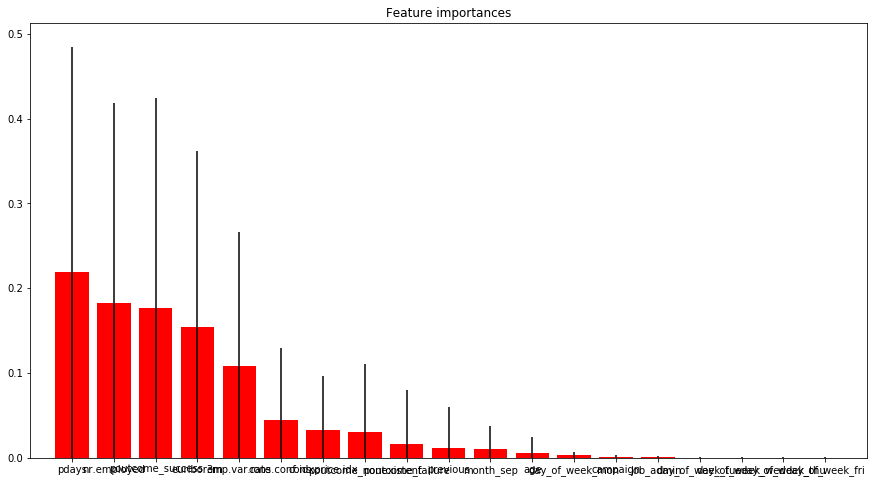

In [13]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print (indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

# Save the graphs
plt.savefig("importances_bank.png",bbox_inches='tight')
plt.savefig("importances_bank.pdf",bbox_inches='tight')

### Confusion Matrix 

Normalized confusion matrix


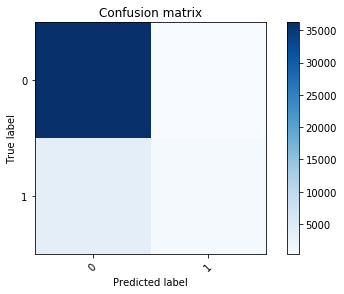

In [14]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
                      title='Confusion matrix')

plt.savefig("confusion_bank.png",bbox_inches='tight')
plt.savefig("confusion_bank.pdf",bbox_inches='tight')